In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Mall_Customers.csv')


In [61]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [62]:
#### separation

In [63]:
x=df.iloc[:,[3,4]]

In [64]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [65]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### explore the data

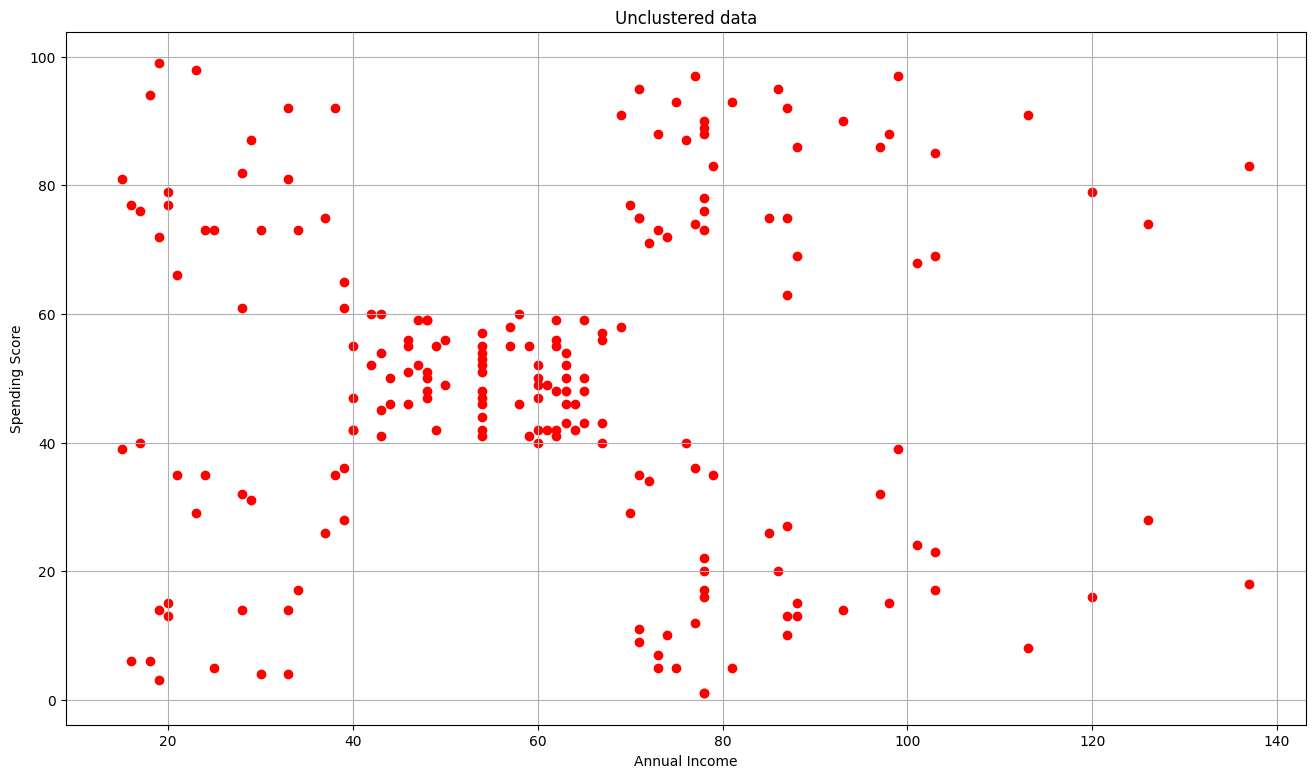

In [66]:
plt.figure(figsize=(16,9))
plt.title('Unclustered data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],color='red',marker='o')

#### elbow method

In [67]:
from sklearn.cluster import KMeans


In [68]:
km=KMeans(random_state=0,n_clusters=5,n_init='auto')


In [69]:
y=km.fit_predict(x)


In [70]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [71]:
km.inertia_

44448.45544793371

In [72]:
sse=[]
for k in range(1,16):
    km=KMeans(n_clusters=k,random_state=0,n_init='auto')
    km.fit_predict(x)
    sse.append(km.inertia_)

In [73]:
sse

[269981.28,
 185917.14253928524,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 38858.9599751439,
 31969.426550235476,
 29858.483597603947,
 22209.851608025543,
 20786.936692059156,
 18612.22286800968,
 17083.672501709316,
 16511.947370563892,
 15599.148331445118,
 14697.298899626934]

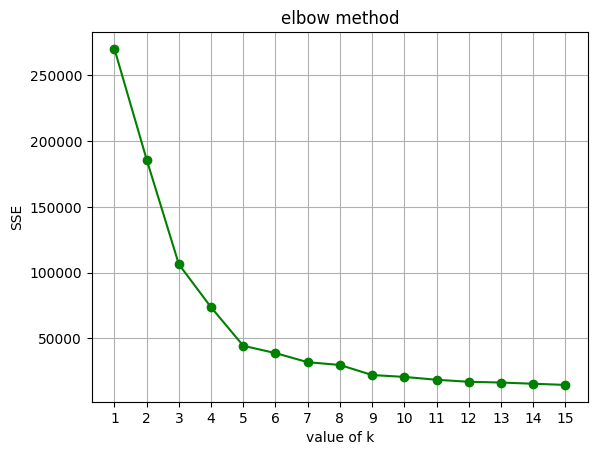

In [74]:
plt.title('elbow method')
plt.grid()
plt.xlabel('value of k')
plt.ylabel('SSE')
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,color='green',marker='o')

In [75]:
km= KMeans(n_clusters=5,random_state=0,n_init='auto')

In [76]:
y=km.fit_predict(x)

In [77]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [78]:
cents=km.cluster_centers_


In [79]:
cents

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

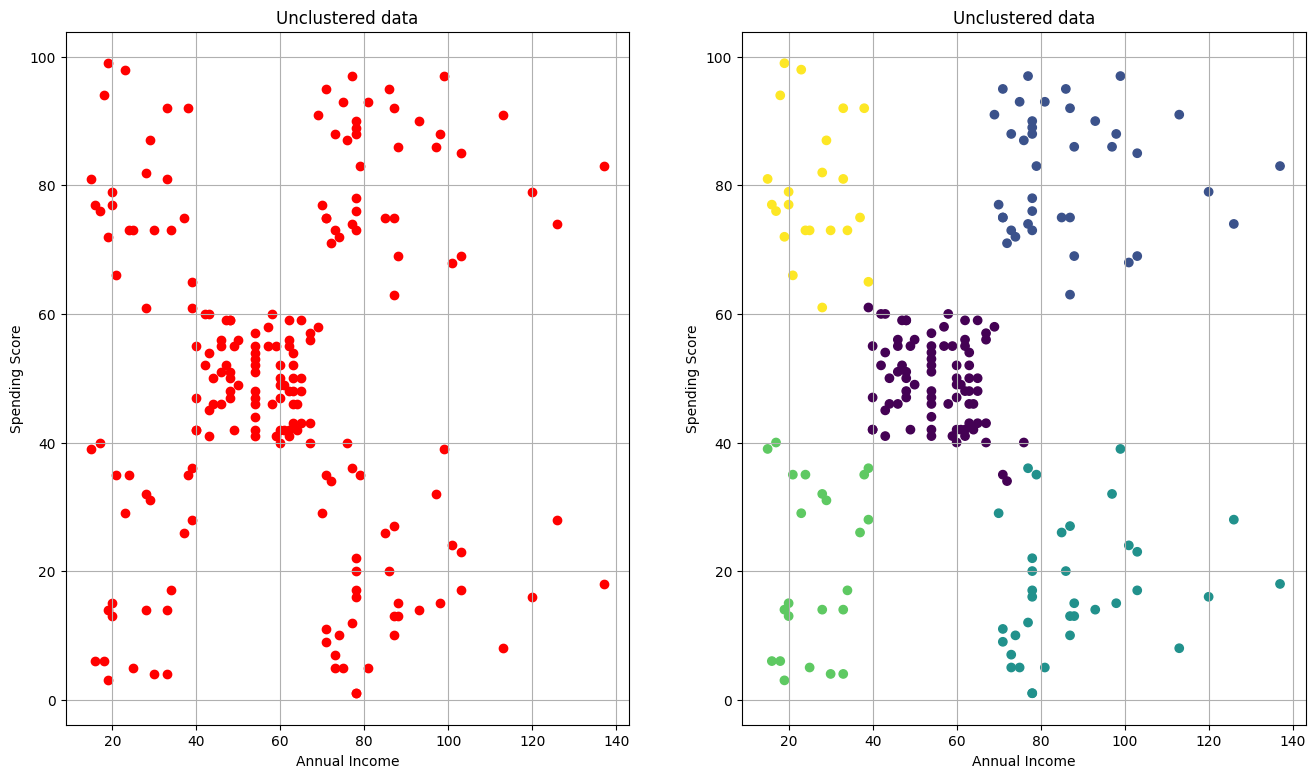

In [80]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],color='red',marker='o')



plt.subplot(1,2,2)
plt.title('Unclustered data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],marker='o',c=y)

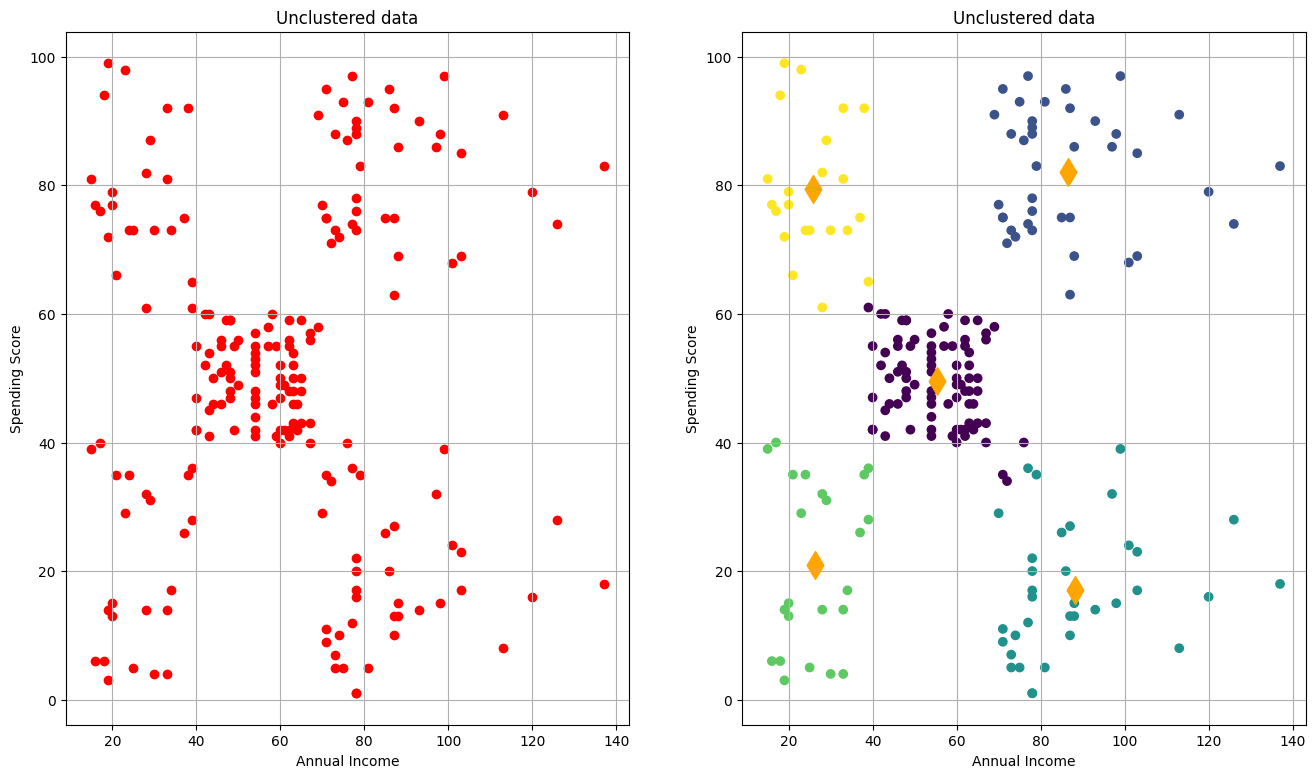

In [81]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],color='red',marker='o')



plt.subplot(1,2,2)
plt.title('Unclustered data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0],x.iloc[:,1],marker='o',c=y)
plt.scatter(cents[:,0],cents[:,1],s=200,color='orange',marker='d')

#### extract the clusters

In [82]:
zero= df[y==0]
one= df[y==1]
two=df[y==2]
three=df[y==3]
four=df[y==4]

In [83]:
print('Cluster-0',len(zero))
print('Cluster-1',len(one))
print('Cluster-2',len(two))
print('Cluster-3',len(three))
print('Cluster-4',len(four))


Cluster-0 81
Cluster-1 39
Cluster-2 35
Cluster-3 23
Cluster-4 22


#### save the csv file

In [88]:
zero.to_csv('zero.csv',index=True)

##### new customer comes predict new data

In [92]:
new=pd.DataFrame([[34,17],[56,10],[104,45],[98,88]],columns=x.columns)

In [94]:
new

,Annual Income (k$),Spending Score (1-100)
0,34,17
1,56,10
2,104,45
3,98,88


In [96]:
km.predict(new)

array([3, 3, 2, 1])

In [99]:
x['Cluster']=y

C:\Users\Bhargav\AppData\Local\Temp\ipykernel_20928\1226906935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Cluster']=y


In [100]:
x

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


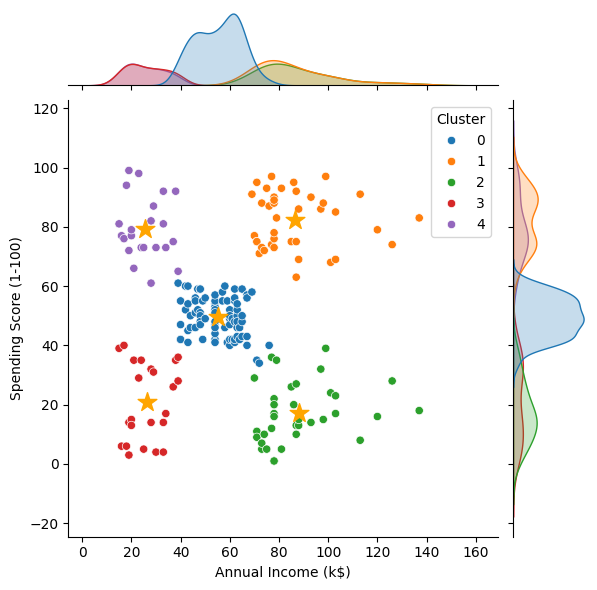

In [103]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=x,hue='Cluster',palette='tab10')
plt.scatter(cents[:,0],cents[:,1],s=200,color='orange',marker='*')

In [104]:
!pip install nltk textblob -U

     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB ? eta -:--:--
      --------------------------------------- 0.0/1.5 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.5 MB 403.5 kB/s eta 0:00:04
     

In [105]:
import nltk